# General informations

In [ ]:
## CHA-AIPH Project
# -*- coding: utf-8 -*-

"""
Created on Tue Jan 20 2021
@author: Tisseaux Antoine

This script is used to predict survival at hospital discharge for ICU patients
ML model used: MLP
"""

'\nCreated on Tue Jan 20 2021\n@author: Tisseaux Antoine\n\nThis script is used to predict survival at hospital discharge for ICU patients\nML model used: MLP\n'

# set environement

Importing packages

In [ ]:
# Importing libraries:
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import auc, RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np

Importing files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



loading csv files

In [ ]:
my_df_all_patients = pd.read_csv('/content/drive/MyDrive/CHAIPH_PROJECT_GR2/project_submission_file_CHA_AIPH_Group1/data/final_dataframes/my_df_survival_preprocess.csv', sep=",")

setting options for pandas

In [ ]:
# Displaying option: all columns
pd.set_option('display.max_columns', None)

setting a random seed:

In [ ]:
# setting random seed
SEED = 25

# Creating train and test datasets:

In [ ]:
# creating a vector y with the outcome:
y = np.array(my_df_all_patients["hospital_death"])

# creating a dataset X with the variables used for the prediction
X = np.array(my_df_all_patients.drop('hospital_death', axis=1))

## splitting the data into train set and test set:

80% for training, 20% for testing : (test_size = 0.2)

we stratify on outcome

In [ ]:
# splitting scaled data:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

Data augmentation

In [ ]:
ros = RandomOverSampler(random_state=SEED)

X_training, y_training = ros.fit_resample(X_training, y_training)

## vizualizing splitting:

# Creating an the MLP model:

K-fold cross validation parameters:

In [ ]:
# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

# K-fold Cross Validation model evaluation
fold_no = 1

creating lists to save model results during cross validation: 

In [ ]:
# performance evaluation
acc_per_fold = []
loss_per_fold = []

definying model and fiting with cross validation:

In [ ]:
for train_index, val_index in kfold.split(X_training, y_training):
  X_train, X_val = X_training[train_index], X_training[val_index]
  y_train, y_val = y_training[train_index], y_training[val_index]

  # Define the model architecture
  # create model
  model = Sequential()
  model.add(Dense(14, input_dim=25, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  # optimimizer
  opt = keras.optimizers.Adam(learning_rate=0.0001)

  # Compile model
  model.compile(loss='BinaryCrossentropy',
                optimizer=opt,
                metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(X_train, y_train, batch_size=5, epochs=100, verbose=1)

  # Generate generalization metrics
  scores = model.evaluate(X_val, y_val, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1])
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

print("Accuracy: %.2f%% (%.2f%%)" % (np.mean(acc_per_fold)*100, np.std(acc_per_fold)*100))
print("Loss: %.2f (%.2f)" % (np.mean(loss_per_fold), np.std(loss_per_fold)))

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
4529/4529 [==============================] - 8s 2ms/step - loss: 9.6390 - accuracy: 0.5192
Epoch 2/100
4529/4529 [==============================] - 7s 2ms/step - loss: 0.9787 - accuracy: 0.5505
Epoch 3/100
4529/4529 [==============================] - 8s 2ms/step - loss: 0.9358 - accuracy: 0.5741
Epoch 4/100
4529/4529 [==============================] - 7s 2ms/step - loss: 0.9221 - accuracy: 0.5852
Epoch 5/100
4529/4529 [==============================] - 8s 2ms/step - loss: 0.8869 - accuracy: 0.5872
Epoch 6/100
4529/4529 [==============================] - 8s 2ms/step - loss: 0.8855 - accuracy: 0.5928
Epoch 7/100
4529/4529 [==============================] - 8s 2ms/step - loss: 0.8408 - accuracy: 0.5991
Epoch 8/100
4529/4529 [==============================] - 8s 2ms/step - loss: 0.8646 - accuracy: 0.5995
Epoch 9/100
4529/4529 [==============================] - 7s 2ms/step - loss: 0.

Computing Predictions for test set:

In [ ]:
y_pred = np.round(model.predict(X_test))

# Performance evaluation:

## Confusion Matrix

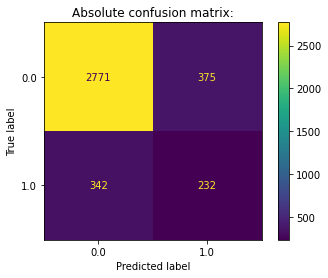

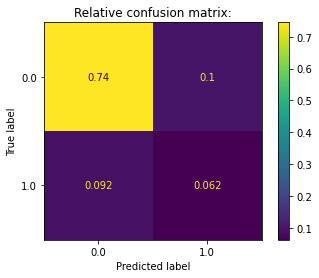

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Absolute confusion matrix:")
plt.show()

# displaying relative confusion matrix:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='all')
plt.title("Relative confusion matrix:")
plt.show()

## Performance scores

In [ ]:
# performance scores
print('accuracy score: %f\n' % accuracy_score(y_test, y_pred))
print('f1_score: %f\n' % f1_score(y_test, y_pred, average='weighted'))
print('recall score: %f\n' % recall_score(y_test, y_pred, average='weighted'))
print('precision score: %f\n' % precision_score(y_test, y_pred, average='weighted'))

accuracy score: 0.807258

f1_score: 0.809443

recall score: 0.807258

precision score: 0.811764



## ROC curve

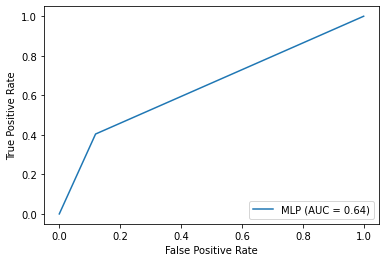


roc_auc score: 0.6424911009168215


In [ ]:
# displaying ROC curve:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(tpr=tpr, fpr=fpr, roc_auc=roc_auc, estimator_name="MLP")
display.plot()
plt.show()

print('\nroc_auc score:', roc_auc_score(y_test, y_pred, average='weighted'))

##Saving model:

In [ ]:
model.save('/content/drive/MyDrive/CHAIPH_PROJECT_GR2/scripts/models')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CHAIPH_PROJECT_GR2/scripts/models/assets
